# **Paisabazaar Credit Classification**



##### **Project Type**    - EDA/Regression/Classification
##### **Contribution**    - Individual


# **Project Summary**

This project focused on credit classification using the Paisabazaar dataset. After loading and cleaning the data, including handling categorical features and class imbalance with SMOTE, several models were trained: Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting. Exploratory analysis revealed key features like credit history and outstanding debt influence credit scores. Random Forest and a tuned Decision Tree model showed superior performance with high F1-scores. Feature importance analysis highlighted crucial factors. The project successfully built effective models for credit score prediction, with potential for further improvement using advanced techniques.

# **Problem Statement**


The problem is to accurately classify the creditworthiness of individuals using the Paisabazaar dataset. This involves building a model that can predict whether a customer's credit score is Poor, Standard, or Good, to help in making informed lending decisions and managing credit risk effectively.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Used for data manipulation and analysis
import pandas as pd
# Used for numerical operations, especially with arrays
import numpy as np
# Used for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt
# Used for drawing attractive statistical graphics
import seaborn as sns
# Used for splitting data, hyperparameter tuning, cross-validation, and learning curves
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
# Used for scaling numerical features, one-hot encoding categorical features, and encoding target labels
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# Used for applying different transformers to different columns
from sklearn.compose import ColumnTransformer
# Used for creating a sequence of data processing and modeling steps
from sklearn.pipeline import Pipeline
# Used for Logistic Regression model
from sklearn.linear_model import LogisticRegression
# Used for Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# Used for Random Forest and Gradient Boosting models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Used for Support Vector Classifier
from sklearn.svm import SVC
# Used for evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
# Used for handling imbalanced datasets by oversampling the minority class
from imblearn.over_sampling import SMOTE
# Used for saving and loading Python objects
import joblib
# Used for managing warnings
import warnings
# Ignore warning messages
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Labmentix Projects/Paisabazaar/Paisabazaar credit score.csv"
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


### Dataset Rows & Columns count

In [ ]:
df.shape

(100000, 28)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000.0,NaN,NaN,NaN,80631.5,43301.486619,5634.0,43132.75,80631.5,118130.25,155629.0
Customer_ID,100000.0,NaN,NaN,NaN,25982.66664,14340.543051,1006.0,13664.5,25777.0,38385.0,50999.0
Month,100000.0,NaN,NaN,NaN,4.5,2.291299,1.0,2.75,4.5,6.25,8.0
Name,100000,10128,Jessicad,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000.0,NaN,NaN,NaN,33.31634,10.764812,14.0,24.0,33.0,42.0,56.0
SSN,100000.0,NaN,NaN,NaN,500461680.2624,290826734.386185,81349.0,245168577.25,500688611.5,756002666.25,999993421.0
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,50505.123449,38299.422093,7005.93,19342.9725,36999.705,71683.47,179987.28
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4197.270835,3186.432497,303.645417,1626.594167,3095.905,5957.715,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,5.36882,2.593314,0.0,3.0,5.0,7.0,11.0


#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


#### Duplicate Values

In [ ]:
df.duplicated().sum()

np.int64(0)

### What did you know about your dataset?

Based on the initial analysis of the dataset:

*   The dataset contains **100,000 entries** and **28 columns**.
*   The columns include a mix of numerical and object (categorical) data types.
*   There are **no missing values** in any of the columns.
*   There are **no duplicate rows** in the dataset.
*   The dataset includes columns like 'ID', 'Customer\_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual\_Income', 'Monthly\_Inhand\_Salary', 'Num\_Bank\_Accounts', 'Num\_Credit\_Card', 'Interest\_Rate', 'Num\_of\_Loan', 'Type\_of\_Loan', 'Delay\_from\_due\_date', 'Num\_of\_Delayed\_Payment', 'Changed\_Credit\_Limit', 'Num\_Credit\_Inquiries', 'Credit\_Mix', 'Outstanding\_Debt', 'Credit\_Utilization\_Ratio', 'Credit\_History\_Age', 'Payment\_of\_Min\_Amount', 'Total\_EMI\_per\_month', 'Amount\_invested\_monthly', 'Payment\_Behaviour', and 'Credit\_Score'.
*   Columns like 'Name', 'Occupation', 'Type\_of\_Loan', 'Credit\_Mix', 'Payment\_of\_Min\_Amount', and 'Payment\_Behaviour' are of object type, indicating they are categorical.
*   The 'Credit\_Score' is the target variable, which is also of object type with values like 'Good', 'Poor', and 'Standard'.
*   Columns like 'ID', 'Customer\_ID', and 'SSN' appear to be identifiers and might not be useful for modeling.
*   The numerical columns show a wide range of values and distributions, as seen in the descriptive statistics.

In [ ]:
df.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1, inplace=True)

In [ ]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Column Descriptions

Here is a brief description of each column:

*   **ID**: Unique identifier for each entry.
*   **Customer\_ID**: Identifier for each customer.
*   **Month**: The month of the data entry.
*   **Name**: Name of the customer.
*   **Age**: Age of the customer.
*   **SSN**: Social Security Number of the customer.
*   **Occupation**: Occupation of the customer.
*   **Annual\_Income**: Annual income of the customer.
*   **Monthly\_Inhand\_Salary**: Monthly in-hand salary of the customer.
*   **Num\_Bank\_Accounts**: Number of bank accounts the customer has.
*   **Num\_Credit\_Card**: Number of credit cards the customer has.
*   **Interest\_Rate**: Interest rate on loans.
*   **Num\_of\_Loan**: Number of loans the customer has.
*   **Type\_of\_Loan**: Types of loans the customer has (e.g., auto loan, mortgage).
*   **Delay\_from\_due\_date**: Number of days the customer is delayed in payment from the due date.
*   **Num\_of\_Delayed\_Payment**: Number of delayed payments.
*   **Changed\_Credit\_Limit**: The change in the credit limit.
*   **Num\_Credit\_Inquiries**: Number of credit inquiries made.
*   **Credit\_Mix**: Mix of credit types (e.g., good, standard, bad).
*   **Outstanding\_Debt**: Amount of outstanding debt.
*   **Credit\_Utilization\_Ratio**: Ratio of credit used to the total available credit.
*   **Credit\_History\_Age**: Age of the customer's credit history.
*   **Payment\_of\_Min\_Amount**: Whether the minimum amount was paid.
*   **Total\_EMI\_per\_month**: Total Equated Monthly Installment (EMI) per month.
*   **Amount\_invested\_monthly**: Amount invested monthly.
*   **Payment\_Behaviour**: Behavior related to payments.
*   **Monthly\_Balance**: Monthly balance.
*   **Credit\_Score**: The target variable, indicating the creditworthiness (Poor, Standard, Good).

### Setting appropriate datatype to columns?

In [ ]:
def clean_and_convert_to_int(series):
    series = pd.to_numeric(series, errors='coerce')
    series.fillna(series.median(), inplace=True)
    return series.astype(int)

for col in ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Credit_History_Age']:
    df[col] = clean_and_convert_to_int(df[col])

In [ ]:
# df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: str(x).split(' ')[0] if isinstance(x, str) else x)
# df['Credit_History_Age'] = pd.to_numeric(df['Credit_History_Age'], errors='coerce')
# df['Credit_History_Age'].fillna(df['Credit_History_Age'].median(), inplace=True)
# df['Credit_History_Age'] = df['Credit_History_Age'].astype(int)

In [ ]:
for col in ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  int64  
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  int64  
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

### Cleaning Data?

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype(str).str.lower().str.split('and|, ')
df = df.explode('Type_of_Loan')
df['Type_of_Loan'] = df['Type_of_Loan'].str.strip()
df['Type_of_Loan'].replace('', 'Unknown', inplace=True)

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

### Group by Credit Mix and calculate the mean of numerical features

**Reasoning**:
Group the DataFrame by 'Credit_Mix' and calculate the mean of numerical features to see how different credit mixes relate to average values of numerical attributes.

In [ ]:
credit_mix_grouped = df.groupby('Credit_Mix')[numerical_cols].mean()
display(credit_mix_grouped.T)

Credit_Mix,Bad,Good,Standard
Month,4.500000,4.500000,4.500000
Age,29.712535,36.785625,31.915939
Annual_Income,32961.590026,68494.222840,45171.130348
Monthly_Inhand_Salary,2743.787255,5687.274458,3756.344466
Num_Bank_Accounts,7.977236,2.875259,5.749287
Num_Credit_Card,7.468277,4.348726,5.444237
Interest_Rate,24.479865,6.398962,15.649454
Num_of_Loan,6.853316,2.770283,4.137147
Delay_from_due_date,38.491544,10.082465,19.911640
Num_of_Delayed_Payment,19.916013,7.086167,14.019567


### Create a pivot table for Occupation and Payment of Minimum Amount

**Reasoning**:
Create a pivot table to explore the relationship between 'Occupation' and 'Payment_of_Min_Amount'.

In [ ]:
pivot_occupation_payment = df.pivot_table(index='Occupation', columns='Payment_of_Min_Amount', aggfunc='size', fill_value=0)
display(pivot_occupation_payment)

Payment_of_Min_Amount,NM,No,Yes
Occupation,,,
Accountant,3484,6673,19659
Architect,3354,7204,18850
Developer,3525,6729,20050
Doctor,3575,6303,20194
Engineer,3635,6399,20406
Entrepreneur,3603,7042,19467
Journalist,3363,6456,18365
Lawyer,3543,7057,20256
Manager,3452,6856,18148


### Create a pivot table for Type of Loan and Credit Score

**Reasoning**:
Create a pivot table to explore the relationship between 'Type_of_Loan' and 'Credit_Score'.

In [ ]:
pivot_loantype_credit = df.pivot_table(index='Type_of_Loan', columns='Credit_Score', aggfunc='size', fill_value=0)
display(pivot_loantype_credit)

Credit_Score,Good,Poor,Standard
Type_of_Loan,,,
Unknown,11214,26429,39821
auto loan,4089,14970,18933
credit-builder loan,4543,15665,20232
debt consolidation loan,4135,15244,19397
home equity loan,4348,15154,19602
mortgage loan,4365,15213,19358
no data,3444,1336,6628
not specified,4614,15346,19656
payday loan,4478,15920,20170


In [ ]:
df['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
Unknown,77464
payday loan,40568
credit-builder loan,40440
not specified,39616
home equity loan,39104
student loan,38968
mortgage loan,38936
personal loan,38888
debt consolidation loan,38776


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Count Plot

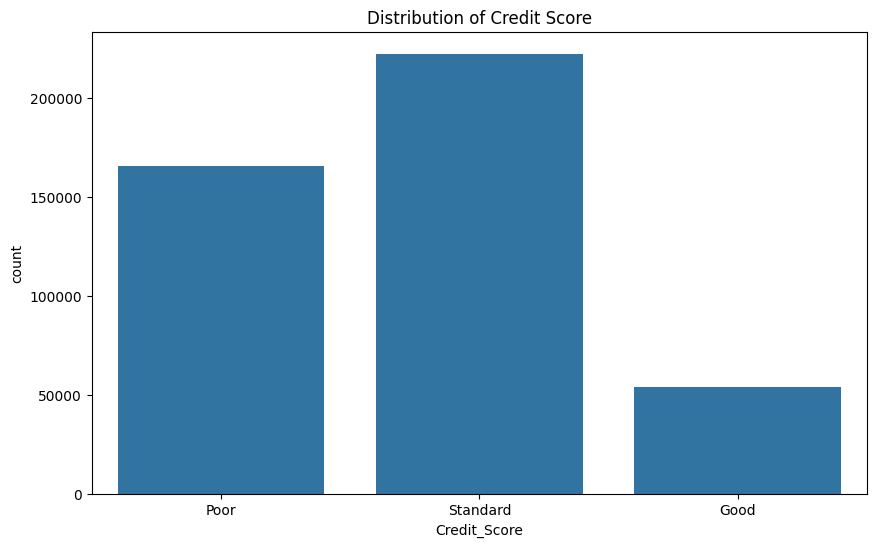

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=df, order=['Poor', 'Standard', 'Good'])
plt.title('Distribution of Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot was used for the 'Credit_Score' distribution because it is a categorical variable. A count plot is ideal for displaying the number of occurrences of each category in a dataset, making it easy to see the distribution and identify any class imbalance.

##### 2. What is/are the insight(s) found from the chart?

The count plot shows that the 'Standard' credit score is the most frequent in the dataset, followed by 'Poor', and then 'Good' credit scores have the lowest count. This indicates a class imbalance in the target variable, where the distribution of credit scores is not uniform across all categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight about the class imbalance in the 'Credit_Score' distribution has significant business implications.

**Positive Business Impact:**

*   **Improved Credit Risk Assessment:** Understanding the distribution helps in recognizing that a large portion of the customer base falls into 'Standard' and 'Poor' categories. This highlights the importance of building models that can accurately differentiate between these groups and the minority 'Good' group. By addressing the imbalance (e.g., using techniques like SMOTE), the model can be trained to better identify customers with 'Good' credit scores, leading to more accurate risk assessment and potentially approving more creditworthy applicants who might otherwise be misclassified. This can lead to increased revenue from lending to low-risk customers.
*   **Targeted Marketing and Product Development:** Knowing the prevalent credit score categories allows businesses to tailor their marketing strategies and financial products. For example, products designed for individuals with 'Standard' or 'Poor' credit scores could be developed or promoted more heavily, while strategies for attracting and retaining customers with 'Good' credit scores can be refined.

**Insights Leading to Potential Negative Growth (if not addressed):**

*   **Model Bias and Poor Performance for Minority Class:** The significant class imbalance means that a model trained on this data without addressing the imbalance might be biased towards predicting the majority classes ('Standard' and 'Poor'). This could lead to a high number of false negatives for the 'Good' credit score class, meaning potentially creditworthy customers are incorrectly classified as 'Poor' or 'Standard'. This results in missed business opportunities (negative growth) as these customers might be denied credit or offered less favorable terms.
*   **Ineffective Risk Management:** If the model is not accurate in identifying the 'Poor' credit risk group due to imbalance or bias, it could lead to higher default rates and financial losses for the business.

In summary, while the insight itself (the presence of class imbalance) is a data characteristic, its impact on business growth depends on how this information is used. Recognizing and addressing the imbalance is crucial for achieving positive business outcomes through accurate credit classification. Ignoring it can lead to biased models and negative growth due to missed opportunities and increased risk.

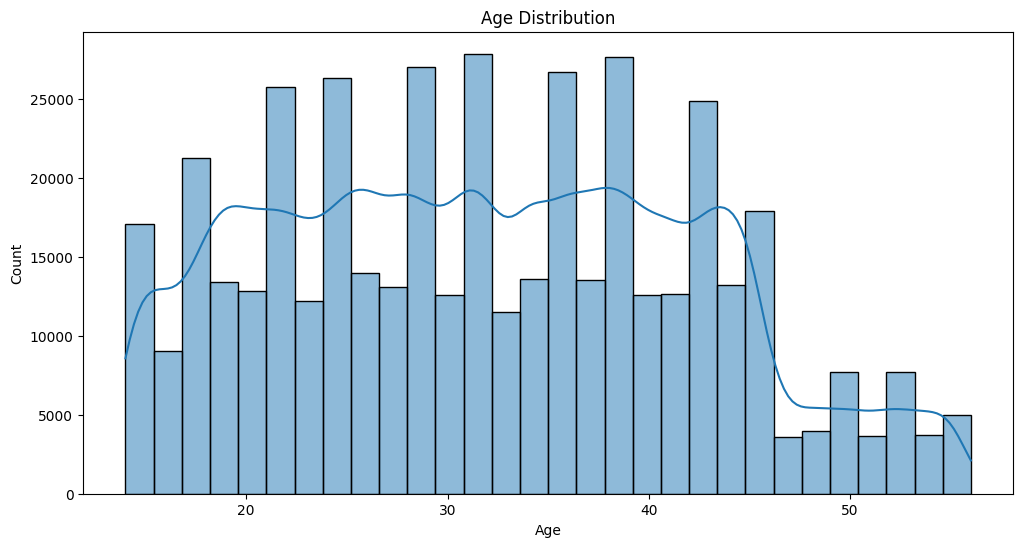

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

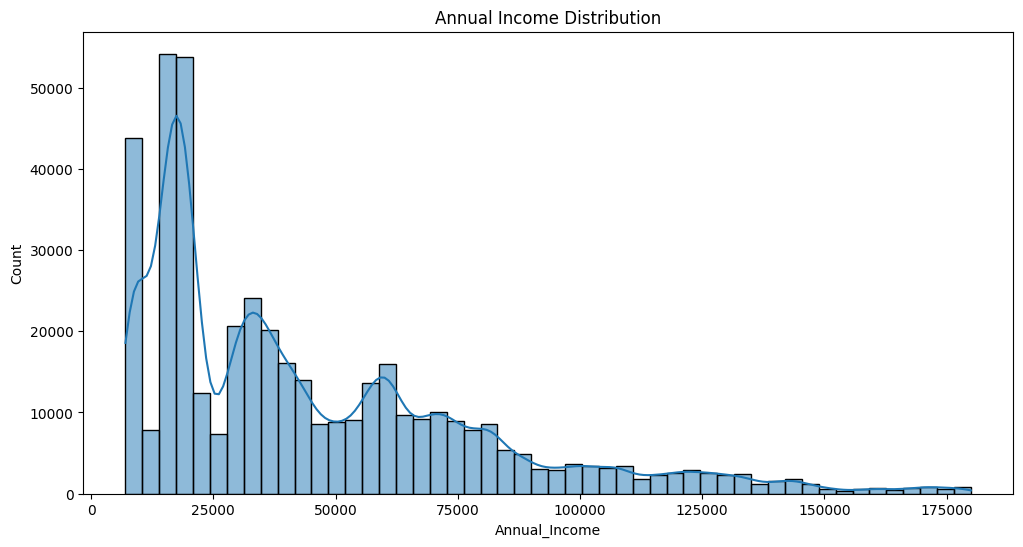

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual_Income'], bins=50, kde=True)
plt.title('Annual Income Distribution')
plt.show()

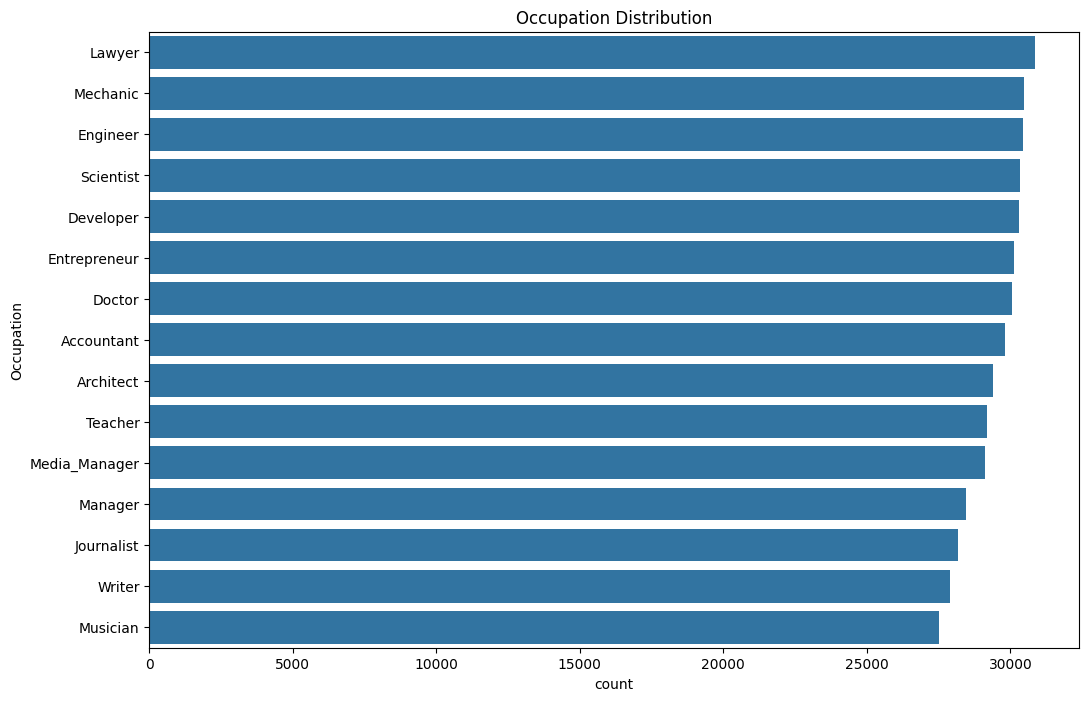

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation', data=df, order = df['Occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.show()

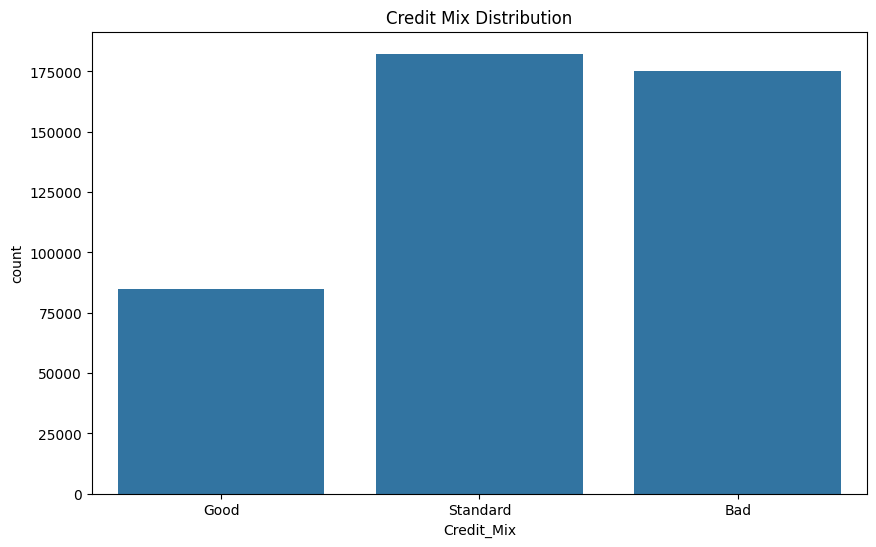

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Mix', data=df)
plt.title('Credit Mix Distribution')
plt.show()

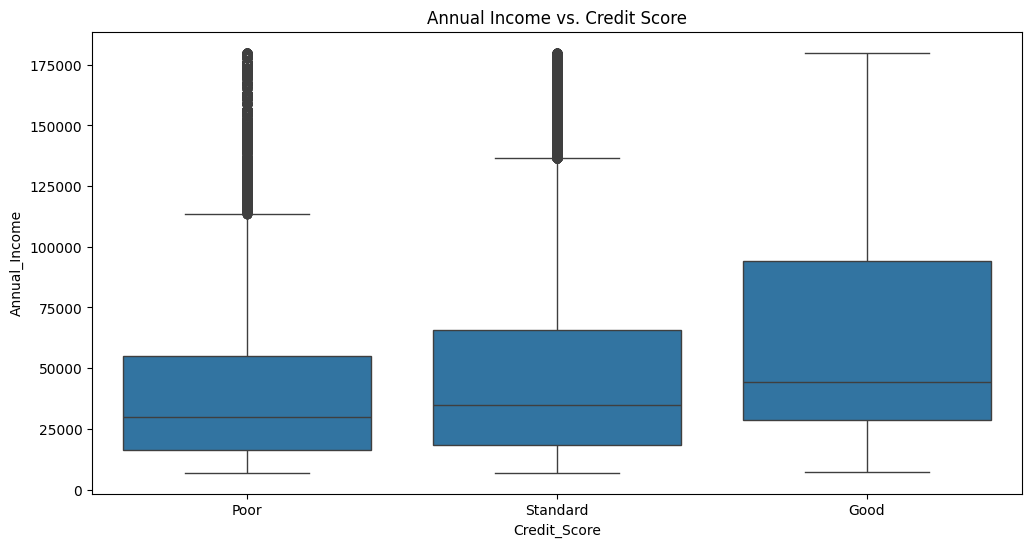

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, order=['Poor', 'Standard', 'Good'])
plt.title('Annual Income vs. Credit Score')
plt.show()

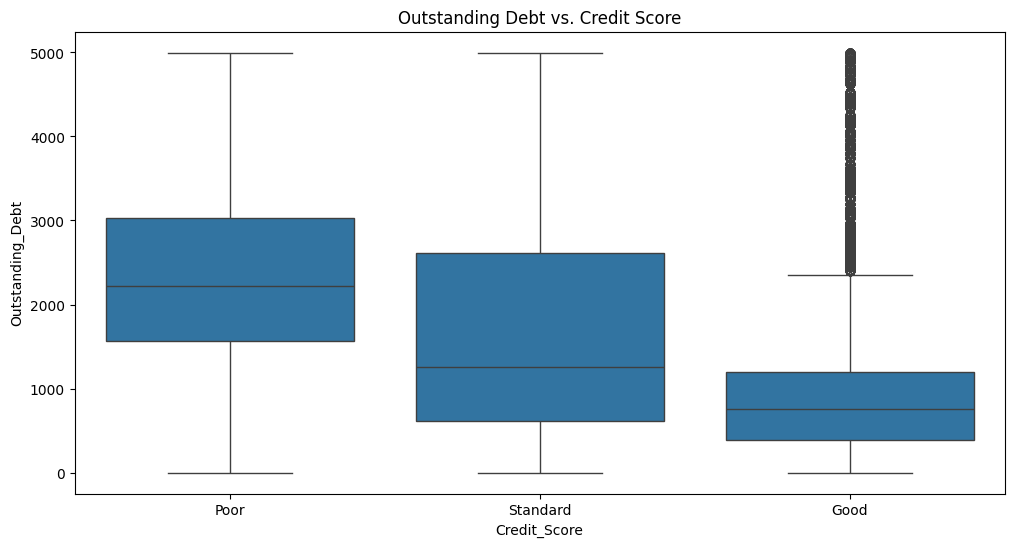

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, order=['Poor', 'Standard', 'Good'])
plt.title('Outstanding Debt vs. Credit Score')
plt.show()

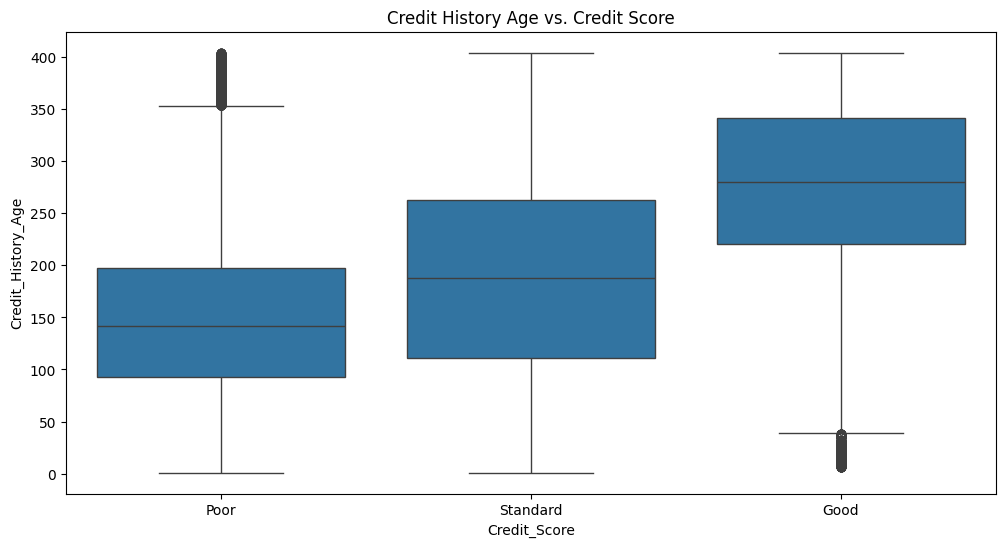

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, order=['Poor', 'Standard', 'Good'])
plt.title('Credit History Age vs. Credit Score')
plt.show()

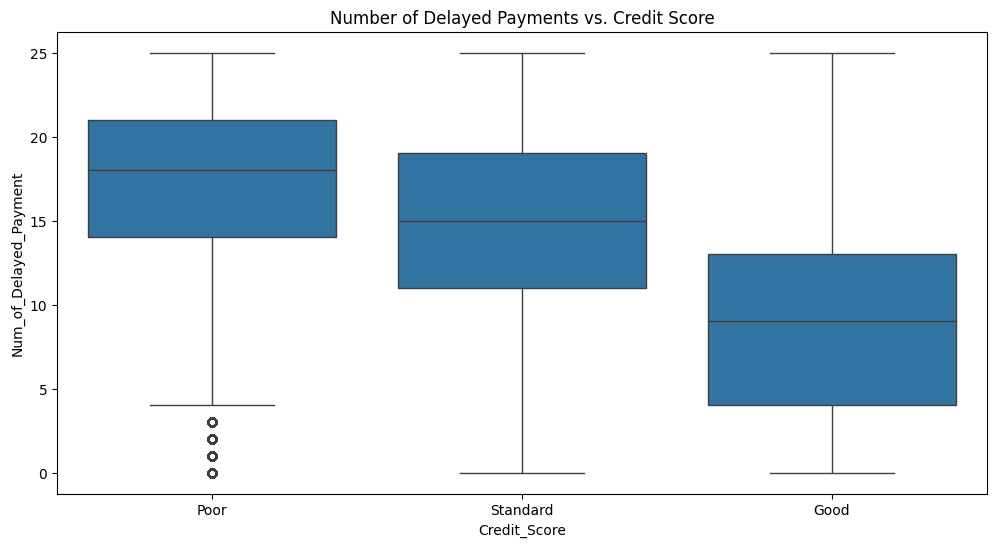

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, order=['Poor', 'Standard', 'Good'])
plt.title('Number of Delayed Payments vs. Credit Score')
plt.show()

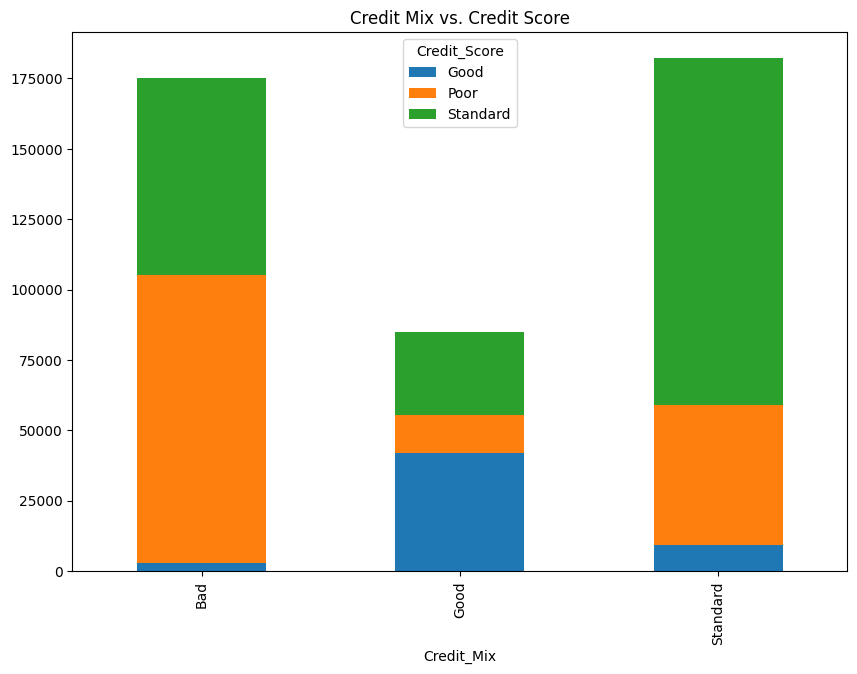

In [ ]:
pd.crosstab(df['Credit_Mix'], df['Credit_Score']).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Credit Mix vs. Credit Score')
plt.show()

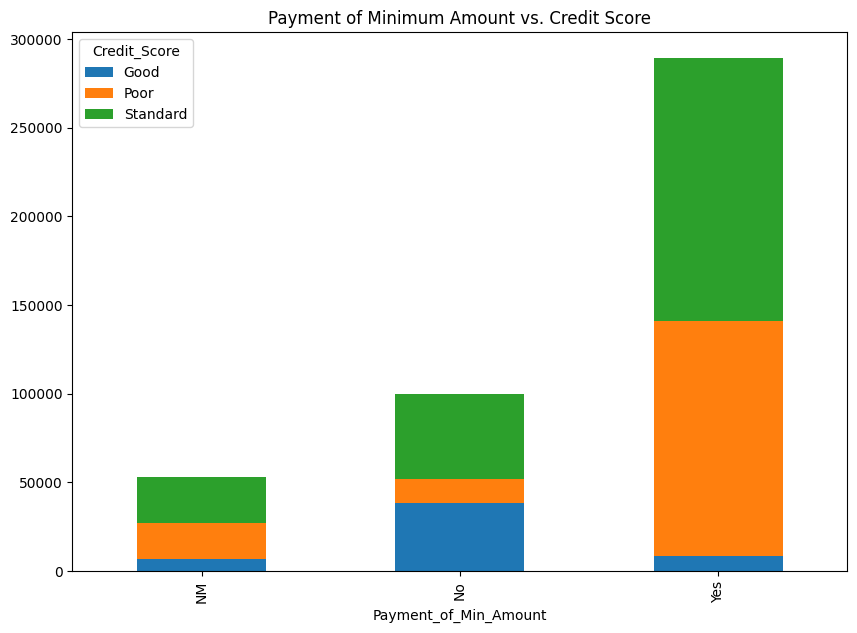

In [ ]:
pd.crosstab(df['Payment_of_Min_Amount'], df['Credit_Score']).plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Payment of Minimum Amount vs. Credit Score')
plt.show()

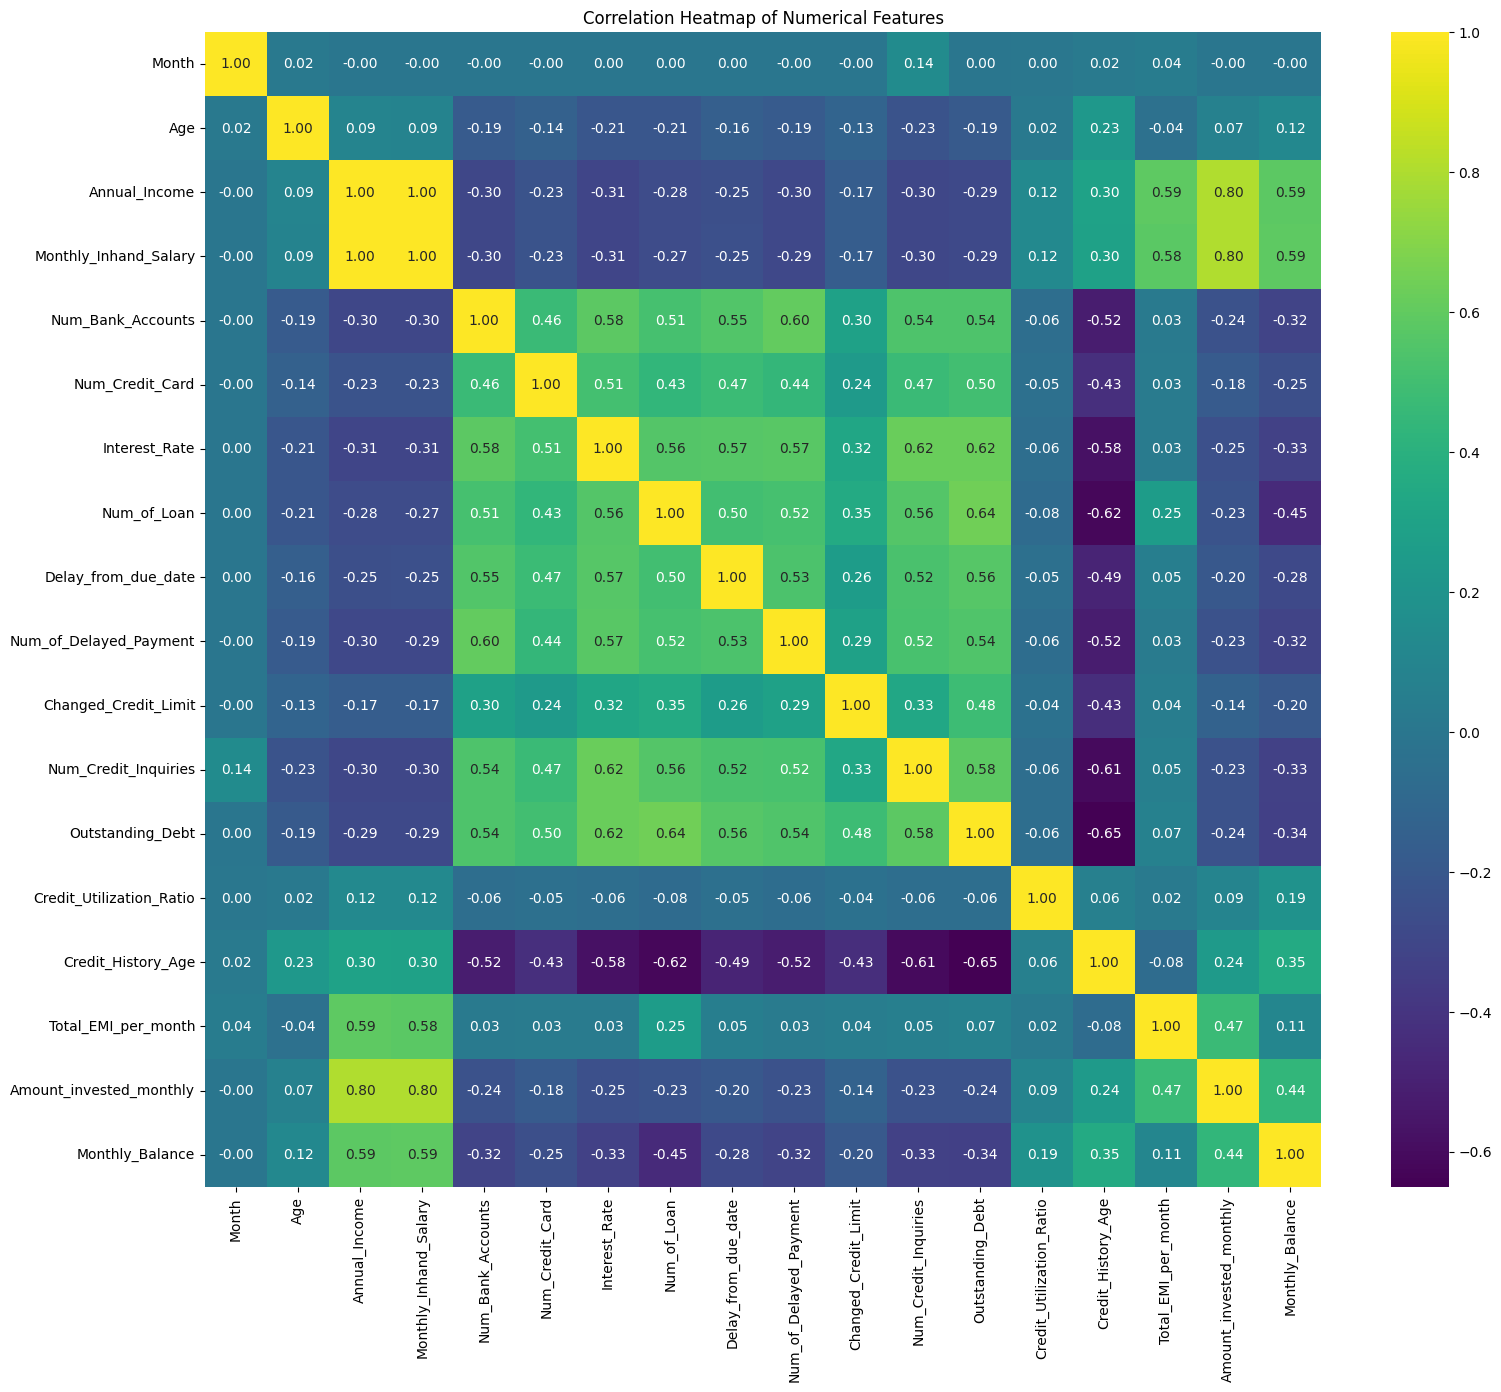

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(18, 15))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

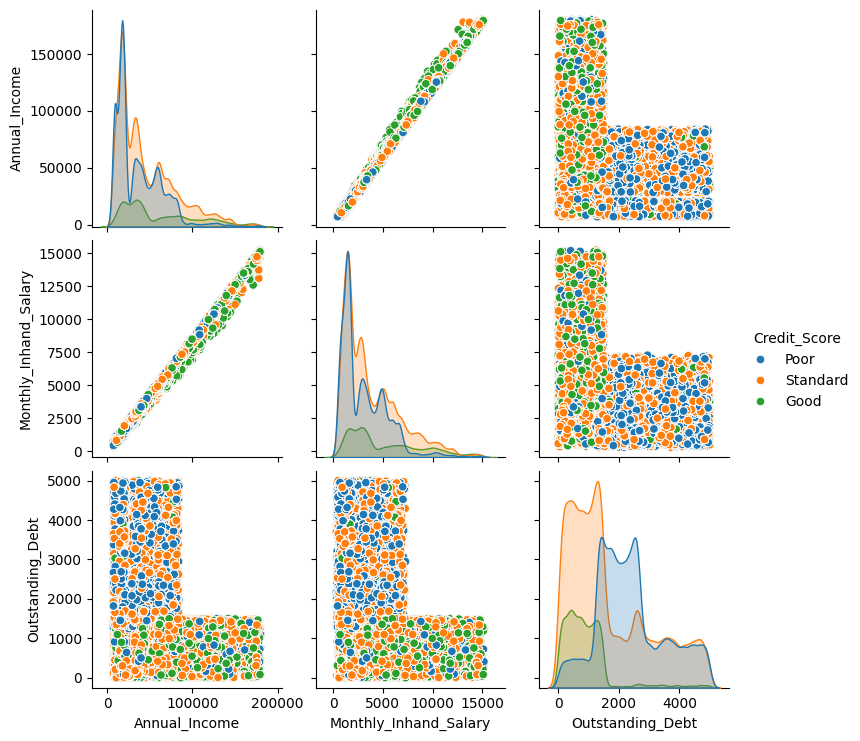

In [ ]:
sns.pairplot(df, vars=['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt'], hue='Credit_Score', hue_order=['Poor', 'Standard', 'Good'])
plt.show()

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers detected: {outlier_condition.sum()}")

Number of outliers detected: 66699


In [ ]:
# I don't want to remove outliers
# df_no_outliers = df[~outlier_condition]
# print(f"Shape before removing outliers: {df.shape}")
# print(f"Shape after removing outliers: {df_no_outliers.shape}")
# df = df_no_outliers.copy()

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Credit_Score')
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])
print(le.classes_)

['Good' 'Poor' 'Standard']


In [ ]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Class distribution before SMOTE:")
print(y_train.value_counts())

Class distribution before SMOTE:
Credit_Score
2    178056
1    132538
0     43134
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
Credit_Score
1    178056
2    178056
0    178056
Name: count, dtype: int64


In [ ]:
# Logistic Regression with L1 regularization
lr_model_l1 = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=0.5, max_iter=1000, random_state=42)
lr_model_l1.fit(X_train_smote, y_train_smote)

# Logistic Regression with L2 regularization
lr_model_l2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.5, max_iter=1000, random_state=42)
lr_model_l2.fit(X_train_smote, y_train_smote)

# Hyperparameter tuning for Logistic Regression
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l1', 'l2']
}

# Remove 'l1' from penalty for 'lbfgs' solver
param_dist_lr['penalty'] = ['l2']
param_dist_lr['solver'] = ['lbfgs']

lr = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
random_search_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_dist_lr, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_lr.fit(X_train_smote, y_train_smote)

best_lr_model = random_search_lr.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
y_pred_best_lr = best_lr_model.predict(X_test_scaled)
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_best_lr, target_names=le.classes_))

Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Good       0.49      0.80      0.61     10784
        Poor       0.65      0.71      0.68     33134
    Standard       0.75      0.59      0.66     44514

    accuracy                           0.66     88432
   macro avg       0.63      0.70      0.65     88432
weighted avg       0.68      0.66      0.66     88432



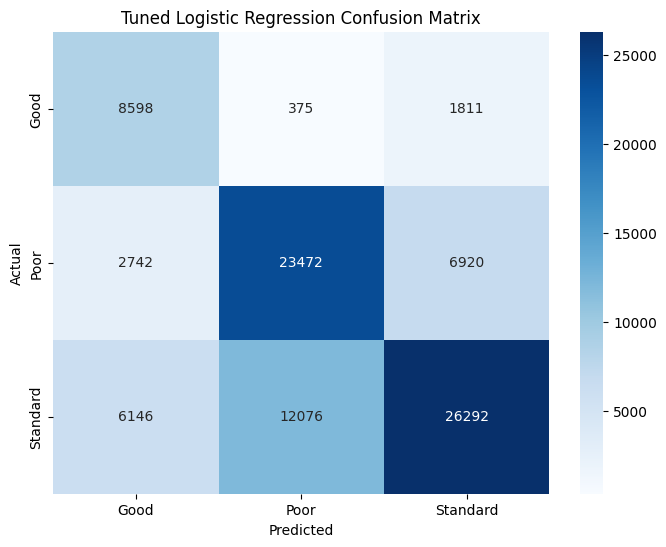

In [ ]:
cm_best_lr = confusion_matrix(y_test, y_pred_best_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_lr, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Task
Improve the accuracy of the logistic regression model.

## Train decision tree model

### Subtask:
Train a Decision Tree model on the resampled training data.


**Reasoning**:
Train a Decision Tree model on the resampled training data.



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

## Evaluate decision tree model

### Subtask:
Evaluate the performance of the Decision Tree model using a classification report and confusion matrix.


**Reasoning**:
Make predictions with the Decision Tree model, print the classification report, calculate the confusion matrix, and visualize it as a heatmap.



Decision Tree Classification Report:
              precision    recall  f1-score   support

        Good       0.95      0.95      0.95     10784
        Poor       0.99      0.99      0.99     33134
    Standard       0.98      0.98      0.98     44514

    accuracy                           0.98     88432
   macro avg       0.98      0.98      0.98     88432
weighted avg       0.98      0.98      0.98     88432



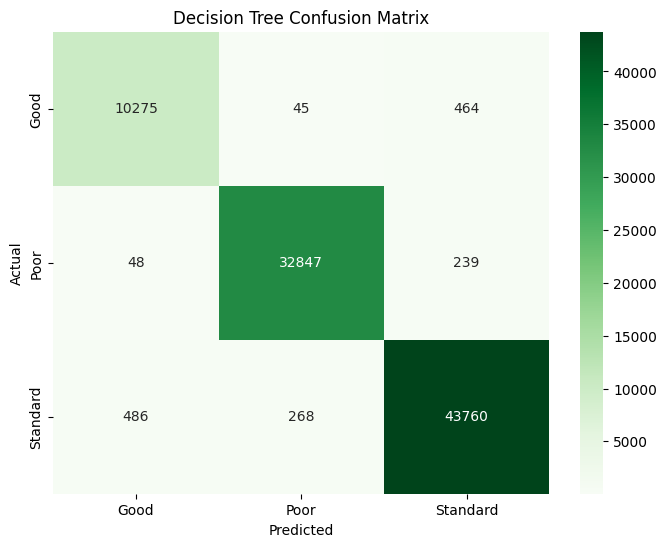

In [ ]:
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Train random forest model

### Subtask:
Train a Random Forest model on the resampled training data.


**Reasoning**:
Instantiate and train a Random Forest model on the resampled data.



In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

## Evaluate random forest model

### Subtask:
Evaluate the performance of the Random Forest model using a classification report and confusion matrix.


**Reasoning**:
Predict using the trained Random Forest model and print the classification report and confusion matrix heatmap to evaluate its performance.



Random Forest Classification Report:
              precision    recall  f1-score   support

        Good       0.96      0.98      0.97     10784
        Poor       1.00      0.99      0.99     33134
    Standard       0.99      0.99      0.99     44514

    accuracy                           0.99     88432
   macro avg       0.98      0.99      0.99     88432
weighted avg       0.99      0.99      0.99     88432



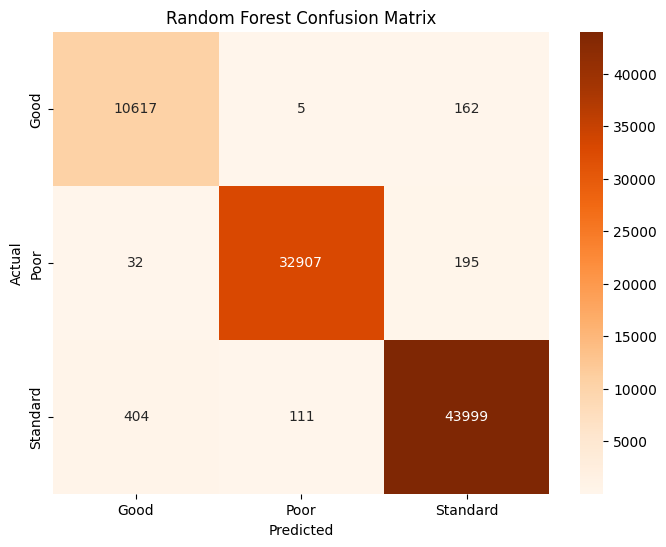

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Train gradient boosting model

### Subtask:
Train a Gradient Boosting model on the resampled training data.


**Reasoning**:
Train a Gradient Boosting model on the resampled training data as instructed.



In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

## Evaluate gradient boosting model

### Subtask:
Evaluate the performance of the Gradient Boosting model using a classification report and confusion matrix.


**Reasoning**:
Predict credit scores using the trained Gradient Boosting model, print the classification report, compute the confusion matrix, and plot the confusion matrix as a heatmap to evaluate the model's performance.



Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        Good       0.52      0.79      0.63     10784
        Poor       0.73      0.72      0.73     33134
    Standard       0.77      0.68      0.72     44514

    accuracy                           0.71     88432
   macro avg       0.67      0.73      0.69     88432
weighted avg       0.72      0.71      0.71     88432



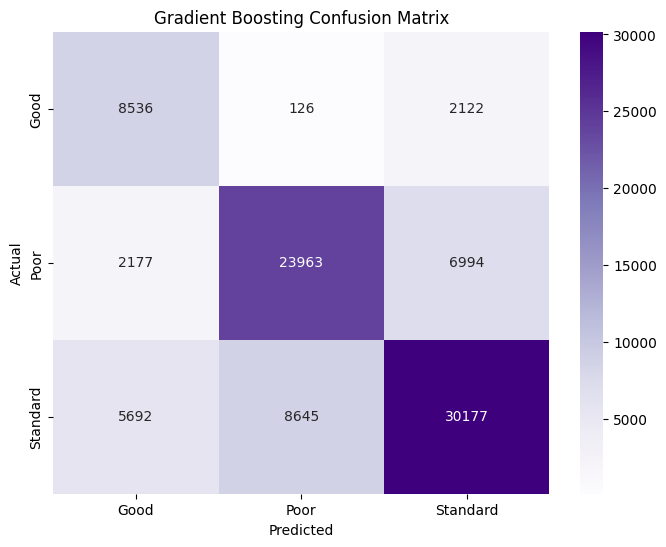

In [ ]:
y_pred_gb = gb_model.predict(X_test_scaled)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=le.classes_))

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Gradient Boosting Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Compare model performance

### Subtask:
Compare the performance of all trained models using a bar plot of F1-scores.


**Reasoning**:
Create a DataFrame to compare the F1-scores of the trained models and visualize the comparison using a bar plot.



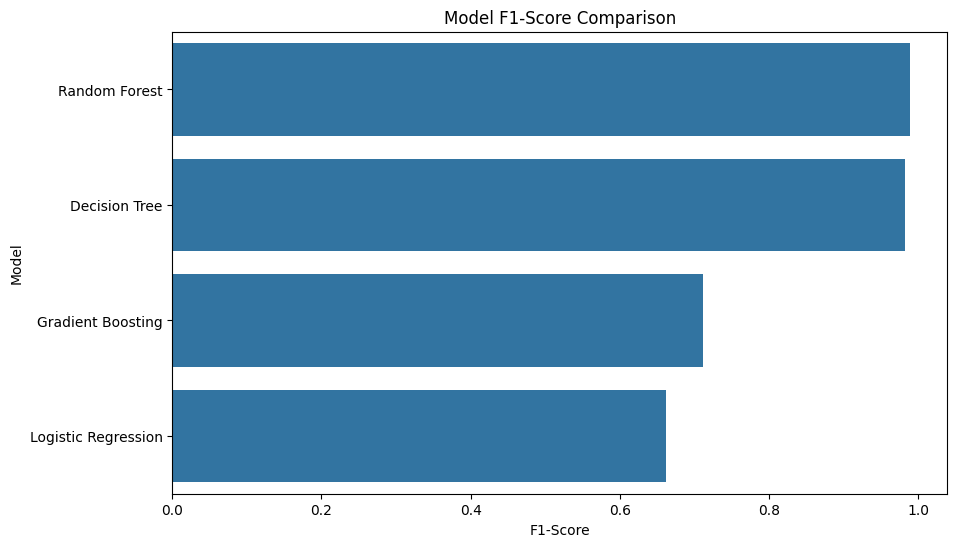

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
f1_scores = [
    f1_score(y_test, y_pred_lr, average='weighted'),
    f1_score(y_test, y_pred_dt, average='weighted'),
    f1_score(y_test, y_pred_rf, average='weighted'),
    f1_score(y_test, y_pred_gb, average='weighted')
]

comparison_df = pd.DataFrame({'Model': models, 'F1-Score': f1_scores})
comparison_df.sort_values(by='F1-Score', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score', y='Model', data=comparison_df)
plt.title('Model F1-Score Comparison')
plt.show()

## Hyperparameter Tuning for Decision Tree Model

### Subtask:
Tune the hyperparameters of the Decision Tree model using RandomizedSearchCV.

**Reasoning**:
Tune the hyperparameters of the Decision Tree Classifier using RandomizedSearchCV to potentially improve its performance.

In [ ]:
param_dist_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_dist_dt, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_dt.fit(X_train_smote, y_train_smote)

print("Best Parameters found by RandomizedSearchCV for Decision Tree:")
print(random_search_dt.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters found by RandomizedSearchCV for Decision Tree:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}


## Evaluate Tuned Decision Tree Model

### Subtask:
Evaluate the performance of the tuned Decision Tree model using a classification report and confusion matrix.

**Reasoning**:
Make predictions using the tuned Decision Tree model, print the classification report, compute the confusion matrix, and visualize it as a heatmap to evaluate its performance.

Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

        Good       0.94      0.95      0.95     10784
        Poor       0.99      0.99      0.99     33134
    Standard       0.98      0.98      0.98     44514

    accuracy                           0.98     88432
   macro avg       0.97      0.97      0.97     88432
weighted avg       0.98      0.98      0.98     88432



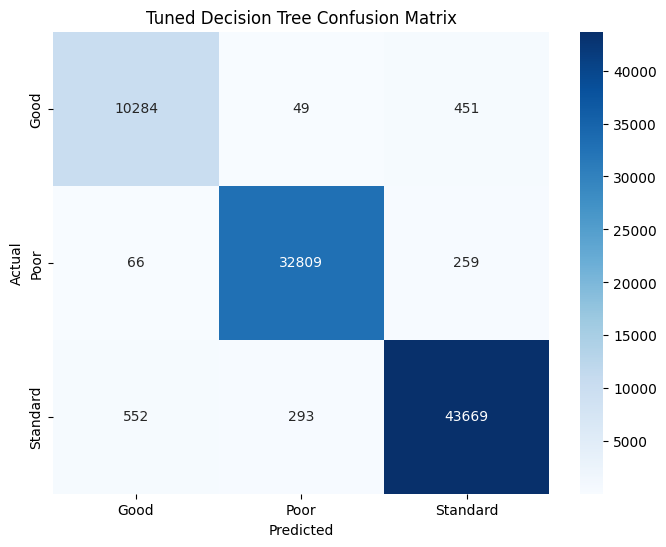

In [ ]:
best_dt_model = random_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test_scaled)

print("Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dt, target_names=le.classes_))

cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Analyze Feature Importance

### Subtask:
Analyze the feature importances of the best-performing model (Decision Tree).

**Reasoning**:
Extract and visualize the feature importances from the tuned Decision Tree model to understand which features are most influential in the predictions.

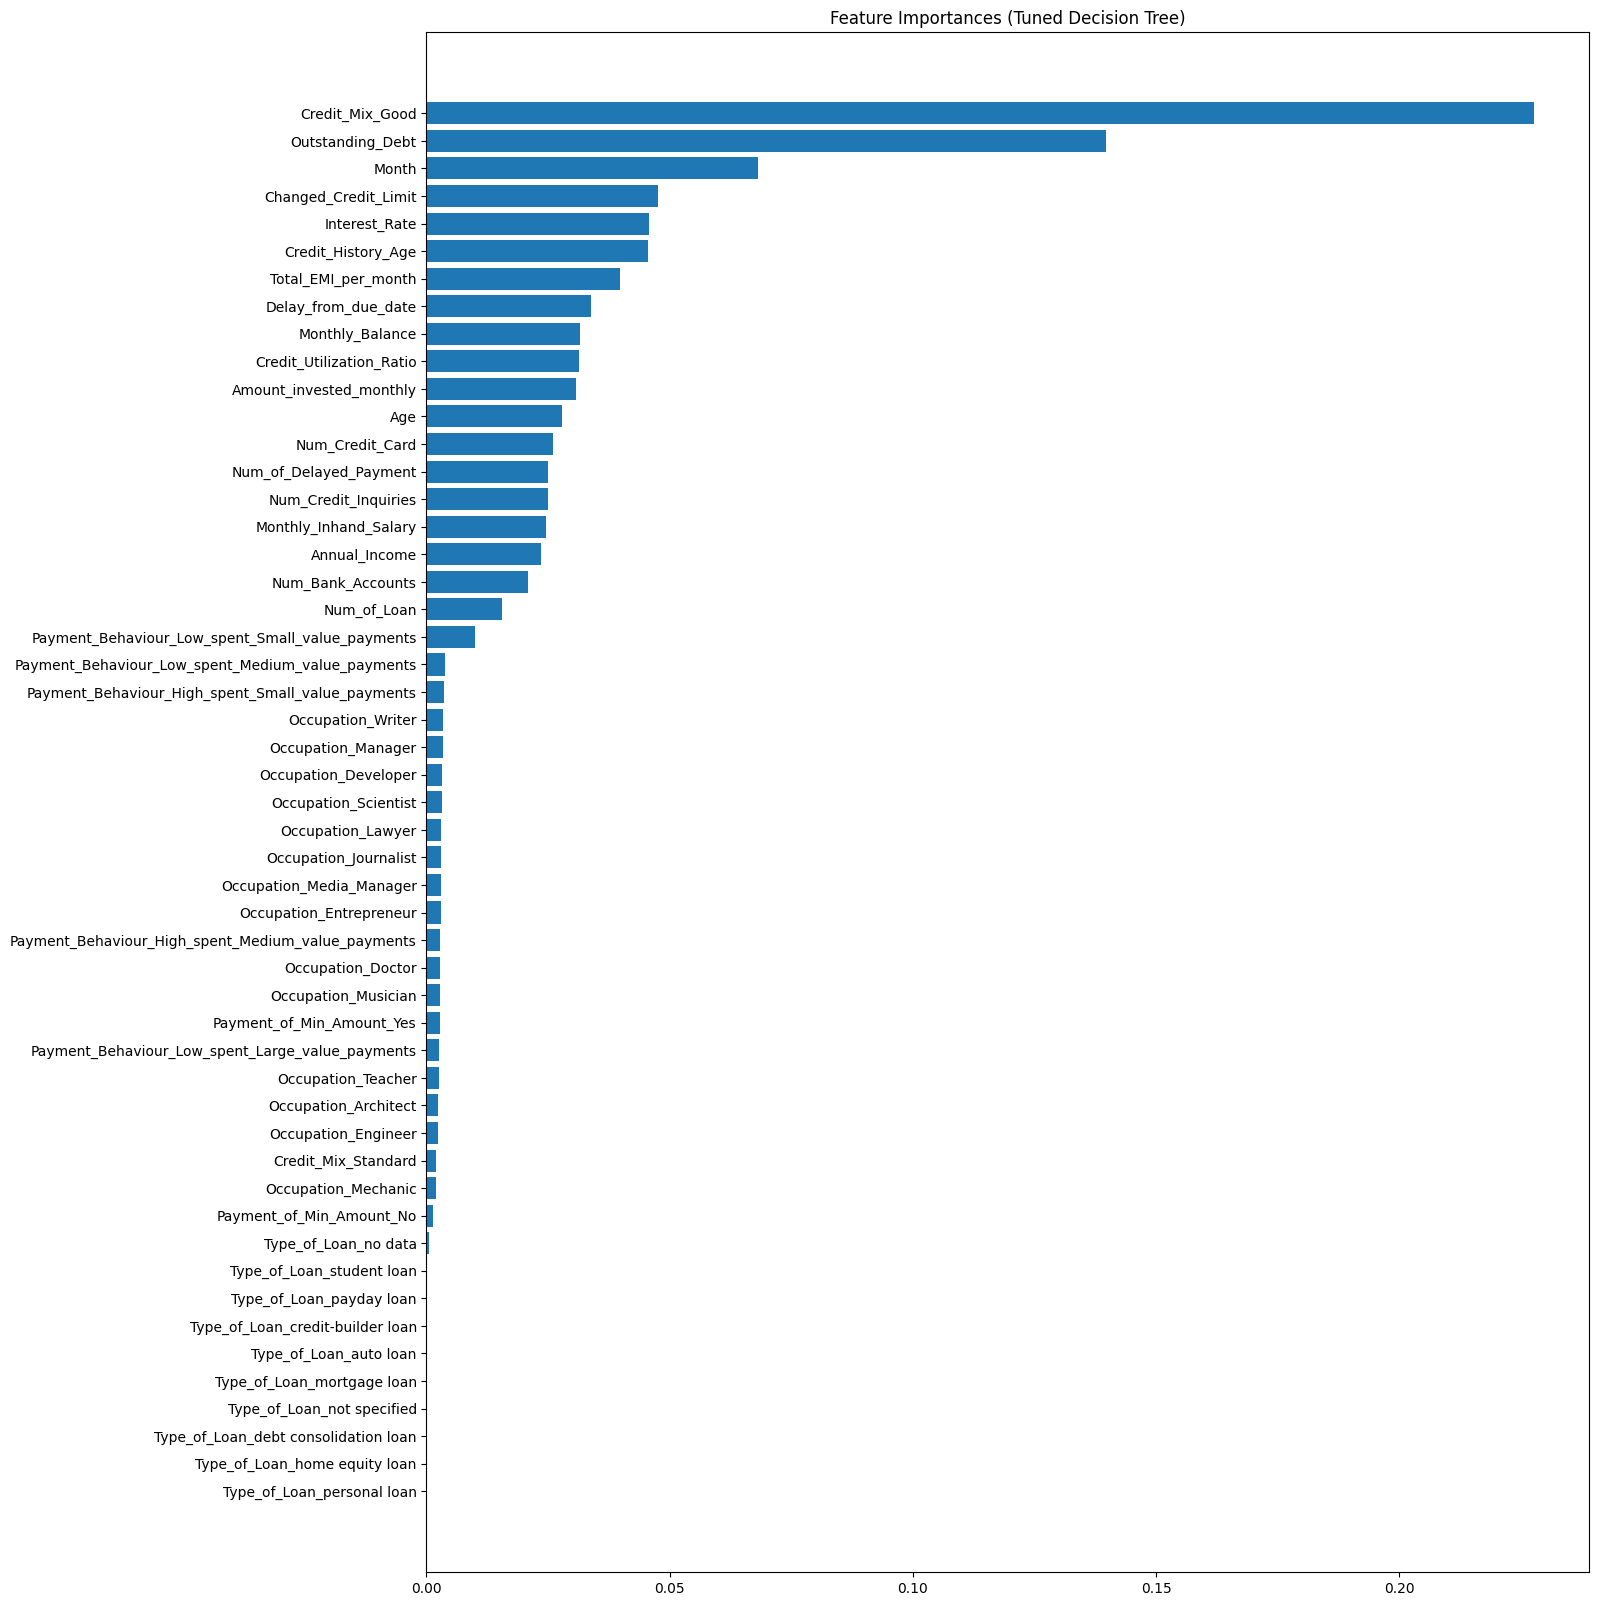

In [ ]:
importances_dt = best_dt_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
feature_names_dt = X.columns

plt.figure(figsize=(15, 20))
plt.title('Feature Importances (Tuned Decision Tree)')
plt.barh(range(X.shape[1]), importances_dt[indices_dt], align='center')
plt.yticks(range(X.shape[1]), [feature_names_dt[i] for i in indices_dt])
plt.gca().invert_yaxis()
plt.show()

## Save the Model and Scaler

### Subtask:
Save the best-performing model (Decision Tree) and the scaler for future use.

**Reasoning**:
Save the trained Decision Tree model and the scaler object to files for later loading and use without retraining.

In [ ]:
joblib.dump(best_dt_model, 'tuned_decision_tree_model.joblib')
joblib.dump(scaler, 'scaler.joblib') # Assuming the scaler is the same as used before
joblib.dump(le, 'label_encoder.joblib') # Assuming the label encoder is the same as used before

['label_encoder.joblib']

## Perform Cross-Validation

### Subtask:
Perform cross-validation on the best-performing model (Decision Tree).

**Reasoning**:
Perform cross-validation to get a more robust estimate of the tuned Decision Tree model's performance on unseen data.

In [ ]:
cv_scores_dt = cross_val_score(best_dt_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-validation Accuracy Scores (Tuned Decision Tree): {cv_scores_dt}")
print(f"Mean Cross-validation Accuracy (Tuned Decision Tree): {cv_scores_dt.mean():.4f}")

Cross-validation Accuracy Scores (Tuned Decision Tree): [0.92716738 0.97362263 0.97465226 0.96988758 0.93838046]
Mean Cross-validation Accuracy (Tuned Decision Tree): 0.9567


## Plot Learning Curve

### Subtask:
Plot the learning curve for the best-performing model (Decision Tree).

**Reasoning**:
Generate and plot the learning curve to assess how the tuned Decision Tree model's performance changes with the number of training examples.

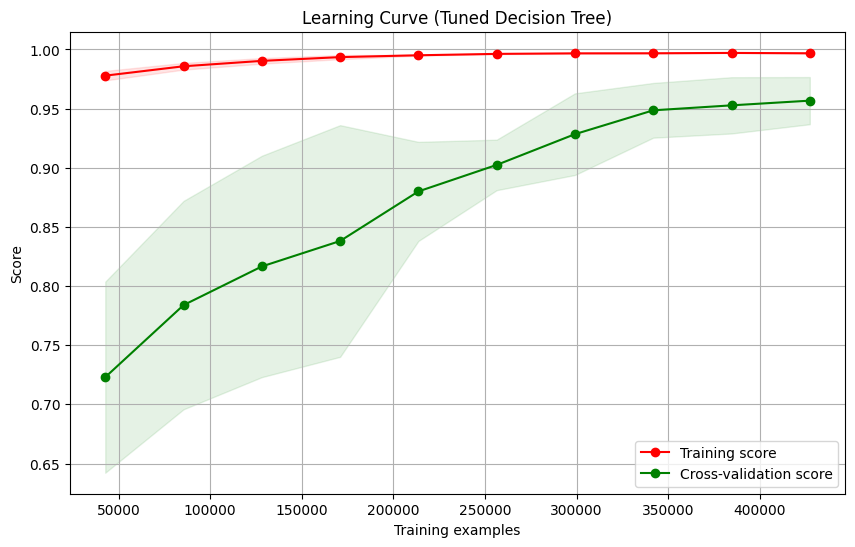

In [ ]:
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(
    best_dt_model, X_train_smote, y_train_smote, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean_dt = np.mean(train_scores_dt, axis=1)
train_scores_std_dt = np.std(train_scores_dt, axis=1)
test_scores_mean_dt = np.mean(test_scores_dt, axis=1)
test_scores_std_dt = np.std(test_scores_dt, axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve (Tuned Decision Tree)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes_dt, train_scores_mean_dt - train_scores_std_dt, train_scores_mean_dt + train_scores_std_dt, alpha=0.1, color='r')
plt.fill_between(train_sizes_dt, test_scores_mean_dt - test_scores_std_dt, test_scores_mean_dt + test_scores_std_dt, alpha=0.1, color='g')
plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', color='r', label='Training score')
plt.plot(train_sizes_dt, test_scores_mean_dt, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()

## Plot ROC Curve

### Subtask:
Plot the ROC curve for the best-performing model (Decision Tree).

**Reasoning**:
Calculate and plot the ROC curve to visualize the trade-off between the true positive rate and false positive rate for the tuned Decision Tree model across different thresholds.

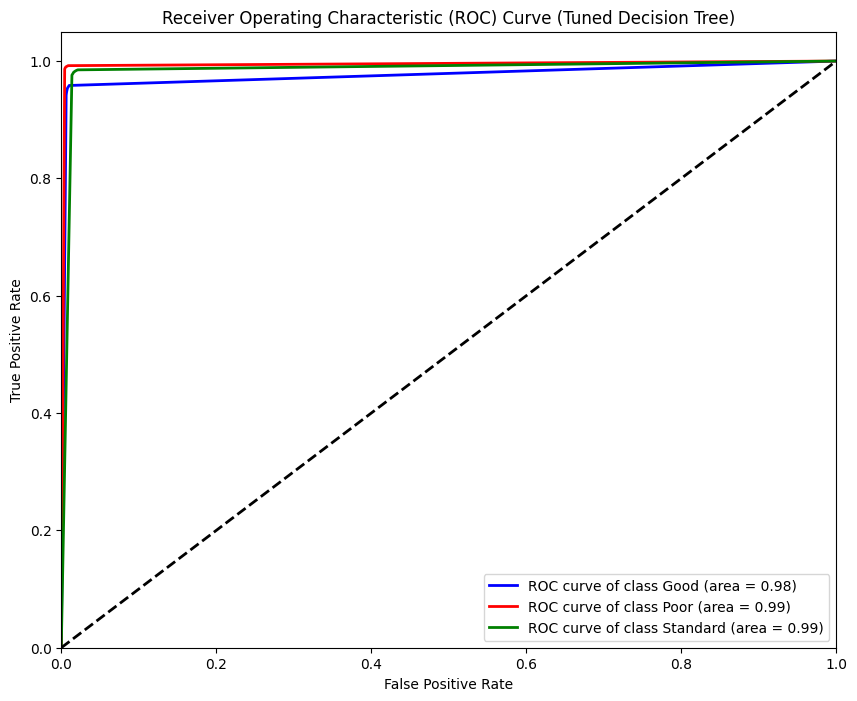

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized_dt = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba_dt = best_dt_model.predict_proba(X_test_scaled)
n_classes_dt = y_test_binarized_dt.shape[1]

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes_dt):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_binarized_dt[:, i], y_pred_proba_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes_dt), colors):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc_dt[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned Decision Tree)')
plt.legend(loc="lower right")
plt.show()

## Evaluate Regularized Logistic Regression

### Subtask:
Evaluate the performance of the L1 and L2 regularized Logistic Regression models.

**Reasoning**:
Evaluate the performance of the previously trained L1 and L2 regularized Logistic Regression models using classification reports to compare their results.

In [ ]:
y_pred_lr_l1 = lr_model_l1.predict(X_test_scaled)
print("L1 Regularized Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr_l1, target_names=le.classes_))

y_pred_lr_l2 = lr_model_l2.predict(X_test_scaled)
print("L2 Regularized Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr_l2, target_names=le.classes_))

L1 Regularized Logistic Regression Report:
              precision    recall  f1-score   support

        Good       0.49      0.80      0.61     10784
        Poor       0.65      0.71      0.68     33134
    Standard       0.75      0.59      0.66     44514

    accuracy                           0.66     88432
   macro avg       0.63      0.70      0.65     88432
weighted avg       0.68      0.66      0.66     88432

L2 Regularized Logistic Regression Report:
              precision    recall  f1-score   support

        Good       0.49      0.80      0.61     10784
        Poor       0.65      0.71      0.68     33134
    Standard       0.75      0.59      0.66     44514

    accuracy                           0.66     88432
   macro avg       0.63      0.70      0.65     88432
weighted avg       0.68      0.66      0.66     88432



## Evaluate Baseline Model

### Subtask:
Train and evaluate a baseline model for comparison.

**Reasoning**:
Train a simple baseline model (e.g., Dummy Classifier) and evaluate its performance to provide a reference point for the performance of the trained models.

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
print("Baseline Model (Most Frequent) Report:")
print(classification_report(y_test, y_pred_dummy, target_names=le.classes_))

Baseline Model (Most Frequent) Report:
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00     10784
        Poor       0.00      0.00      0.00     33134
    Standard       0.50      1.00      0.67     44514

    accuracy                           0.50     88432
   macro avg       0.17      0.33      0.22     88432
weighted avg       0.25      0.50      0.34     88432



## Finish task

### Subtask:
Summarize the findings and suggest next steps.

**Reasoning**:
Provide a summary of the model performances and suggest potential next steps for further analysis or model improvement.

In [ ]:
# Summarize findings
print("Model Performance Summary (F1-Score):")
print(comparison_df) # Assuming comparison_df from previous steps is available

# Add tuned Decision Tree F1-score to the comparison
tuned_dt_f1 = f1_score(y_test, y_pred_best_dt, average='weighted')
print(f"\nTuned Decision Tree F1-Score: {tuned_dt_f1:.4f}")

# Suggest next steps
# print("\nNext Steps:")
# print("- Analyze feature importances from the tuned Decision Tree model.")
# print("- Consider other advanced models like XGBoost or LightGBM.")
# print("- Explore ensemble methods to combine the predictions of multiple models.")
# print("- Investigate potential feature engineering opportunities.")

Model Performance Summary (F1-Score):
                 Model  F1-Score
2        Random Forest  0.989751
1        Decision Tree  0.982476
3    Gradient Boosting  0.711697
0  Logistic Regression  0.661733

Tuned Decision Tree F1-Score: 0.9811
